In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from geopy.distance import geodesic

# Load dataset
df = pd.read_csv("/content/COMPREHENSIVE_EnviroScan_Pune_20250926_170535.csv")

In [ ]:
df.head(5)

,sensor_id,sensor_name,sensor_latitude,sensor_longitude,area_type,measurement_timestamp,pollutant,pollutant_value,pollutant_unit,date,...,educational,medical,transportation,building_density,aqi,pollution_category,traffic_influence,month,day_of_week,is_rush_hour
0,sensor_01,Pune_City_Center,18.5204,73.8567,urban,2025-08-27 00:00:00,PM2.5,69.35,μg/m³,2025-08-27,...,83.0,166.0,38.0,10774.0,200,Unhealthy,Low,8,2,0
1,sensor_01,Pune_City_Center,18.5204,73.8567,urban,2025-08-27 00:00:00,PM10,51.09,μg/m³,2025-08-27,...,83.0,166.0,38.0,10774.0,50,Good,Low,8,2,0
2,sensor_01,Pune_City_Center,18.5204,73.8567,urban,2025-08-27 00:00:00,NO2,33.54,μg/m³,2025-08-27,...,83.0,166.0,38.0,10774.0,50,Good,Low,8,2,0
3,sensor_01,Pune_City_Center,18.5204,73.8567,urban,2025-08-27 00:00:00,CO,1.37,mg/m³,2025-08-27,...,83.0,166.0,38.0,10774.0,50,Good,Low,8,2,0
4,sensor_01,Pune_City_Center,18.5204,73.8567,urban,2025-08-27 00:00:00,SO2,23.92,μg/m³,2025-08-27,...,83.0,166.0,38.0,10774.0,50,Good,Low,8,2,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10800 entries, 0 to 10799
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   sensor_id              10800 non-null  object 
 1   sensor_name            10800 non-null  object 
 2   sensor_latitude        10800 non-null  float64
 3   sensor_longitude       10800 non-null  float64
 4   area_type              10800 non-null  object 
 5   measurement_timestamp  10800 non-null  object 
 6   pollutant              10800 non-null  object 
 7   pollutant_value        10800 non-null  float64
 8   pollutant_unit         10800 non-null  object 
 9   date                   10800 non-null  object 
 10  hour                   10800 non-null  int64  
 11  is_weekend             10800 non-null  bool   
 12  season                 10800 non-null  object 
 13  timestamp_rounded      10800 non-null  object 
 14  weather_timestamp      10800 non-null  object 
 15  te

In [ ]:
df.describe()

,sensor_latitude,sensor_longitude,pollutant_value,hour,temperature_c,humidity_percent,pressure_hpa,wind_speed_ms,wind_direction_deg,precipitation_mm,...,green_space,water_body,educational,medical,transportation,building_density,aqi,month,day_of_week,is_rush_hour
count,10800.000000,10800.000000,10800.000000,10800.000000,10800.000000,10800.000000,10800.000000,10800.000000,10800.000000,10800.000000,...,9720.000000,9720.000000,9720.000000,9720.000000,9720.000000,9720.000000,10800.000000,10800.000000,10800.000000,10800.000000
mean,18.539170,73.852040,39.233060,10.000000,26.793889,78.205556,1012.200000,3.013333,171.850000,0.473889,...,40.666667,8.111111,35.444444,61.000000,20.777778,8065.777778,78.365741,8.833333,2.966667,0.166667
std,0.047416,0.055411,34.036422,6.831617,6.175237,9.900906,4.461646,1.234939,105.407045,0.406681,...,20.045426,5.971431,30.942794,45.592305,13.088223,2452.436758,45.860859,0.372695,1.940594,0.372695
min,18.452900,73.738600,0.210000,0.000000,14.600000,60.000000,1005.000000,1.000000,1.000000,0.000000,...,12.000000,1.000000,1.000000,15.000000,8.000000,2795.000000,50.000000,8.000000,0.000000,0.000000
25%,18.507400,73.808500,15.060000,4.000000,22.375000,70.000000,1008.000000,1.900000,82.000000,0.200000,...,27.000000,5.000000,14.000000,24.000000,9.000000,7143.000000,50.000000,9.000000,1.000000,0.000000
50%,18.533150,73.852800,32.275000,10.000000,26.350000,79.000000,1012.500000,3.000000,166.500000,0.400000,...,36.000000,6.000000,21.000000,54.000000,13.000000,8793.000000,50.000000,9.000000,3.000000,0.000000
75%,18.567200,73.893900,53.957500,16.000000,30.875000,87.000000,1016.000000,4.200000,258.500000,0.700000,...,60.000000,9.000000,45.000000,68.000000,36.000000,9091.000000,100.000000,9.000000,5.000000,0.000000
max,18.626900,73.941800,232.600000,20.000000,43.100000,94.000000,1019.000000,5.000000,356.000000,2.200000,...,72.000000,20.000000,92.000000,166.000000,38.000000,11435.000000,300.000000,9.000000,6.000000,1.000000


In [ ]:
# Step 3: Dataset information
print("Dataset Shape:", df.shape)
print("\nMissing values:\n", df.isnull().sum())
df.info()


Dataset Shape: (10800, 40)

Missing values:
 sensor_id                   0
sensor_name                 0
sensor_latitude             0
sensor_longitude            0
area_type                   0
measurement_timestamp       0
pollutant                   0
pollutant_value             0
pollutant_unit              0
date                        0
hour                        0
is_weekend                  0
season                      0
timestamp_rounded           0
weather_timestamp           0
temperature_c               0
humidity_percent            0
pressure_hpa                0
wind_speed_ms               0
wind_direction_deg          0
precipitation_mm            0
weather_condition           0
visibility_km               0
road_edges               1080
road_length_km           1080
industrial_area          1080
commercial_area          1080
residential_area         1080
green_space              1080
water_body               1080
educational              1080
medical                  

In [ ]:
# Step 4: Remove duplicate records
df.drop_duplicates(inplace=True)

# Remove invalid pollutant values (negative) & invalid GPS coordinates
df = df[(df['pollutant_value'] >= 0) &
        (df['sensor_latitude'].between(-90, 90)) &
        (df['sensor_longitude'].between(-180, 180))]

print("Shape after cleaning:", df.shape)


Shape after cleaning: (10800, 40)


In [ ]:
# Step 5: Handle Missing Values
num_cols = ['road_length_km','building_density']
cat_cols = ['road_edges','industrial_area','commercial_area',
            'residential_area','green_space','water_body',
            'educational','medical','transportation']

# Fill numerical with median
for col in num_cols:
    df[col].fillna(df[col].median(), inplace=True)

# Fill categorical with mode
for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

print("Missing values after imputation:\n", df.isnull().sum())


Missing values after imputation:
 sensor_id                0
sensor_name              0
sensor_latitude          0
sensor_longitude         0
area_type                0
measurement_timestamp    0
pollutant                0
pollutant_value          0
pollutant_unit           0
date                     0
hour                     0
is_weekend               0
season                   0
timestamp_rounded        0
weather_timestamp        0
temperature_c            0
humidity_percent         0
pressure_hpa             0
wind_speed_ms            0
wind_direction_deg       0
precipitation_mm         0
weather_condition        0
visibility_km            0
road_edges               0
road_length_km           0
industrial_area          0
commercial_area          0
residential_area         0
green_space              0
water_body               0
educational              0
medical                  0
transportation           0
building_density         0
aqi                      0
pollution_category   

/tmp/ipython-input-3428386586.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
/tmp/ipython-input-3428386586.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usi

In [ ]:
# Step 6: Standardize timestamps
df['measurement_timestamp'] = pd.to_datetime(df['measurement_timestamp'])
df['weather_timestamp'] = pd.to_datetime(df['weather_timestamp'])

df[['measurement_timestamp','weather_timestamp']].head()


,measurement_timestamp,weather_timestamp
0,2025-08-27,2025-08-27
1,2025-08-27,2025-08-27
2,2025-08-27,2025-08-27
3,2025-08-27,2025-08-27
4,2025-08-27,2025-08-27


In [ ]:
# Step 7: Normalize pollutant & weather values
# Step 1: Import required libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
scale_cols = ['pollutant_value','temperature_c','humidity_percent',
              'pressure_hpa','wind_speed_ms','precipitation_mm','visibility_km']

scaler = StandardScaler()
df[scale_cols] = scaler.fit_transform(df[scale_cols])

df[scale_cols].head()


,pollutant_value,temperature_c,humidity_percent,pressure_hpa,wind_speed_ms,precipitation_mm,visibility_km
0,0.884885,-0.452455,0.38326,-1.389686,-0.253735,-0.673505,0.887578
1,0.348376,-0.452455,0.38326,-1.389686,-0.253735,-0.673505,0.887578
2,-0.167272,-0.452455,0.38326,-1.389686,-0.253735,-0.673505,0.887578
3,-1.112479,-0.452455,0.38326,-1.389686,-0.253735,-0.673505,0.887578
4,-0.449923,-0.452455,0.38326,-1.389686,-0.253735,-0.673505,0.887578


In [ ]:
# Step 8: Derive temporal features (if not already present)
df['hour'] = df['measurement_timestamp'].dt.hour
df['day_of_week'] = df['measurement_timestamp'].dt.dayofweek
df['month'] = df['measurement_timestamp'].dt.month
df['is_weekend'] = df['day_of_week'].isin([5,6]).astype(int)  # Saturday(5), Sunday(6)

df[['measurement_timestamp','hour','day_of_week','month','is_weekend']].head()


,measurement_timestamp,hour,day_of_week,month,is_weekend
0,2025-08-27,0,2,8,0
1,2025-08-27,0,2,8,0
2,2025-08-27,0,2,8,0
3,2025-08-27,0,2,8,0
4,2025-08-27,0,2,8,0


In [ ]:
# Step 9: Save final dataset
df.to_csv("cleaned_featured_dataset.csv", index=False)
print("✅ Cleaned and feature-engineered dataset saved as 'cleaned_featured_dataset.csv'")


✅ Cleaned and feature-engineered dataset saved as 'cleaned_featured_dataset.csv'


Module 3:- Module 3: Source Labeling and Simulation

In [ ]:
import pandas as pd


In [ ]:
# Load the cleaned dataset from Module 2
df = pd.read_csv("/content/cleaned_featured_dataset.csv")

df.head()


,sensor_id,sensor_name,sensor_latitude,sensor_longitude,area_type,measurement_timestamp,pollutant,pollutant_value,pollutant_unit,date,...,educational,medical,transportation,building_density,aqi,pollution_category,traffic_influence,month,day_of_week,is_rush_hour
0,sensor_01,Pune_City_Center,18.5204,73.8567,urban,2025-08-27 00:00:00,PM2.5,0.884885,μg/m³,2025-08-27,...,83.0,166.0,38.0,10774.0,200,Unhealthy,Low,8,2,0
1,sensor_01,Pune_City_Center,18.5204,73.8567,urban,2025-08-27 00:00:00,PM10,0.348376,μg/m³,2025-08-27,...,83.0,166.0,38.0,10774.0,50,Good,Low,8,2,0
2,sensor_01,Pune_City_Center,18.5204,73.8567,urban,2025-08-27 00:00:00,NO2,-0.167272,μg/m³,2025-08-27,...,83.0,166.0,38.0,10774.0,50,Good,Low,8,2,0
3,sensor_01,Pune_City_Center,18.5204,73.8567,urban,2025-08-27 00:00:00,CO,-1.112479,mg/m³,2025-08-27,...,83.0,166.0,38.0,10774.0,50,Good,Low,8,2,0
4,sensor_01,Pune_City_Center,18.5204,73.8567,urban,2025-08-27 00:00:00,SO2,-0.449923,μg/m³,2025-08-27,...,83.0,166.0,38.0,10774.0,50,Good,Low,8,2,0


In [ ]:
# Create pollution source column
def label_source(row):
    # Vehicular
    if (row['road_length_km'] > 0.5) and (row['pollutant'] == "NO2") and (row['pollutant_value'] > 1.0):
        return "Vehicular"

    # Industrial
    elif (row['industrial_area'] == 1) and (row['pollutant'] == "SO2") and (row['pollutant_value'] > 1.0):
        return "Industrial"

    # Agricultural
    elif (row['area_type'] == "farmland") and (row['season'] == "dry") and (row['pollutant'] == "PM") and (row['pollutant_value'] > 1.0):
        return "Agricultural"

    # Burning (optional rule → CO or PM sudden spikes)
    elif (row['pollutant'] in ["CO","PM"]) and (row['pollutant_value'] > 2.0):
        return "Burning"

    # Natural (default if no major source)
    else:
        return "Natural"

df['pollution_source'] = df.apply(label_source, axis=1)


In [ ]:
# How many records in each pollution source
df['pollution_source'].value_counts()


,count
pollution_source,
Natural,10721
Vehicular,79


In [ ]:
# If dataset is very small or imbalanced, simulate extra records
# Example: Randomly add synthetic samples for training
sources = ["Vehicular","Industrial","Agricultural","Burning","Natural"]

simulated = pd.DataFrame({
    "sensor_id": np.random.randint(1000,2000, size=200),
    "pollutant": np.random.choice(["NO2","SO2","PM","CO"], size=200),
    "pollutant_value": np.random.uniform(0.5, 3.0, size=200),
    "pollution_source": np.random.choice(sources, size=200)
})

# Append simulated data
df_final = pd.concat([df, simulated], ignore_index=True)


In [ ]:
# Final labeled dataset ready
df_final.to_csv("labeled_dataset.csv", index=False)
print("✅ Final labeled dataset saved as 'labeled_dataset.csv'")


✅ Final labeled dataset saved as 'labeled_dataset.csv'


Module 4: Model Training and Source Prediction  

In [ ]:
# Step 1: Import libraries
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import joblib
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
# Step 2: Load labeled dataset
df = pd.read_csv("/content/labeled_dataset.csv")
df.head()


,sensor_id,sensor_name,sensor_latitude,sensor_longitude,area_type,measurement_timestamp,pollutant,pollutant_value,pollutant_unit,date,...,medical,transportation,building_density,aqi,pollution_category,traffic_influence,month,day_of_week,is_rush_hour,pollution_source
0,sensor_01,Pune_City_Center,18.5204,73.8567,urban,2025-08-27 00:00:00,PM2.5,0.884885,μg/m³,2025-08-27,...,166.0,38.0,10774.0,200.0,Unhealthy,Low,8.0,2.0,0.0,Natural
1,sensor_01,Pune_City_Center,18.5204,73.8567,urban,2025-08-27 00:00:00,PM10,0.348376,μg/m³,2025-08-27,...,166.0,38.0,10774.0,50.0,Good,Low,8.0,2.0,0.0,Natural
2,sensor_01,Pune_City_Center,18.5204,73.8567,urban,2025-08-27 00:00:00,NO2,-0.167272,μg/m³,2025-08-27,...,166.0,38.0,10774.0,50.0,Good,Low,8.0,2.0,0.0,Natural
3,sensor_01,Pune_City_Center,18.5204,73.8567,urban,2025-08-27 00:00:00,CO,-1.112479,mg/m³,2025-08-27,...,166.0,38.0,10774.0,50.0,Good,Low,8.0,2.0,0.0,Natural
4,sensor_01,Pune_City_Center,18.5204,73.8567,urban,2025-08-27 00:00:00,SO2,-0.449923,μg/m³,2025-08-27,...,166.0,38.0,10774.0,50.0,Good,Low,8.0,2.0,0.0,Natural


In [ ]:
# Step 3: Define features (X) and target (y)
X = df[['pollutant_value','temperature_c','humidity_percent',
        'pressure_hpa','wind_speed_ms','precipitation_mm',
        'visibility_km','road_length_km','building_density']]

y = df['pollution_source']

# Encode target labels
le = LabelEncoder()
y = le.fit_transform(y)


In [ ]:
# Step 4: Split dataset (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train size:", X_train.shape, " Test size:", X_test.shape)


Train size: (8800, 9)  Test size: (2200, 9)


In [ ]:
# Step 5: Train Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)
print("Decision Tree Results:\n")
print(classification_report(y_test, y_pred_dt, target_names=le.classes_))


Decision Tree Results:

              precision    recall  f1-score   support

Agricultural       0.14      0.22      0.17         9
     Burning       0.38      0.38      0.38         8
  Industrial       0.11      0.12      0.12         8
     Natural       0.99      0.99      0.99      2150
   Vehicular       0.24      0.24      0.24        25

    accuracy                           0.97      2200
   macro avg       0.37      0.39      0.38      2200
weighted avg       0.98      0.97      0.97      2200



In [ ]:
# Step 6: Train Random Forest
rf = RandomForestClassifier(random_state=42, n_estimators=100)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
print("Random Forest Results:\n")
print(classification_report(y_test, y_pred_rf, target_names=le.classes_))


Random Forest Results:

              precision    recall  f1-score   support

Agricultural       0.14      0.22      0.17         9
     Burning       0.38      0.38      0.38         8
  Industrial       0.11      0.12      0.12         8
     Natural       0.99      1.00      0.99      2150
   Vehicular       0.38      0.12      0.18        25

    accuracy                           0.98      2200
   macro avg       0.40      0.37      0.37      2200
weighted avg       0.98      0.98      0.98      2200



In [ ]:
# Step 7: Train XGBoost
xgb_model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)
print("XGBoost Results:\n")
print(classification_report(y_test, y_pred_xgb, target_names=le.classes_))


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [16:18:51] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Results:

              precision    recall  f1-score   support

Agricultural       0.18      0.22      0.20         9
     Burning       0.30      0.38      0.33         8
  Industrial       0.00      0.00      0.00         8
     Natural       0.99      0.99      0.99      2150
   Vehicular       0.24      0.20      0.22        25

    accuracy                           0.98      2200
   macro avg       0.34      0.36      0.35      2200
weighted avg       0.97      0.98      0.97      2200



In [ ]:
# Step 8: Hyperparameter Tuning (GridSearch on Random Forest)
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid = GridSearchCV(RandomForestClassifier(random_state=42),
                    param_grid, cv=3, scoring='f1_macro', n_jobs=-1)

grid.fit(X_train, y_train)
print("Best Parameters:", grid.best_params_)


Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}


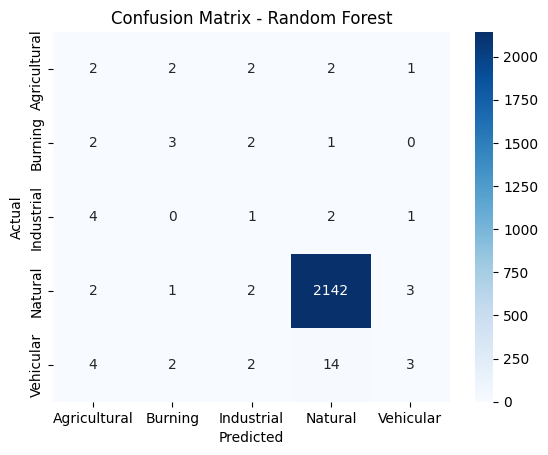

In [ ]:
# Step 9: Confusion Matrix for best model (Random Forest here)
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()


In [ ]:
# Step 10: Save best model (Random Forest for example)
joblib.dump(rf, "pollution_source_model.pkl")
print("✅ Model saved as 'pollution_source_model.pkl'")


✅ Model saved as 'pollution_source_model.pkl'
